In [4]:
import tensorflow as tf
import numpy as np

def custom_loss(y_true, y_pred):
    # Standard Mean Squared Error 
    mse = tf.reduce_mean(tf.square(y_true - y_pred)) 
    
    # Penalty for predictions outside the range [-25, 25] 
    penalty_lower = tf.square (tf.minimum(y_pred + 25, 0)) 
    penalty_upper = tf.square(tf.maximum(y_pred - 25, 0)) 
    
    # Total penalty 
    penalty = tf.reduce_mean (penalty_lower + penalty_upper) 
    
    # Return the combined loss (MSE + penalty) 
    return mse + penalty

model = tf.keras.models.load_model('torque_prediction_model.h5', custom_objects={'custom_loss': custom_loss})

input = np.zeros([1, 12])
global feature
feature = np.array([[0, 0, 0],
                    [0, 0, 0],
                    [0, 0, 0],
                    [0, 0, 0]])#.reshape([1, 12])

T = model.predict(feature.reshape([1, 12]))[0][0]

Data = np.load('data.npy')[35:]

1/1 [==============================] - 0s 53ms/step


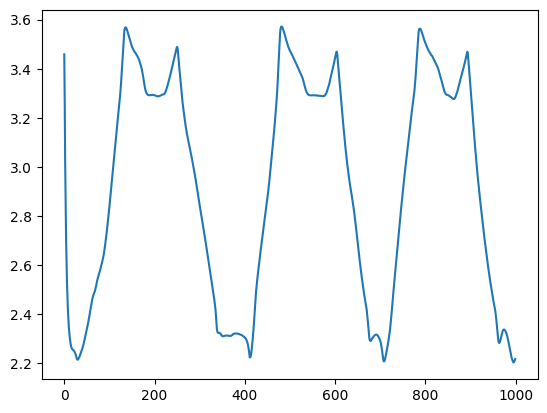

In [8]:
Pred = []

for i, j, q, w in Data[:1000]:  
    qpos, qvel = q/360, w/360

    if j!=0: 
        feature = np.delete(feature, (0), axis=0)
        feature = np.vstack([feature, [qpos, qvel, T]])
        T = model.predict(feature.reshape([1, 12]), verbose=0)[0][0]
        print(i, end='\r')

        Pred.append([T])

plt.plot(Pred)

In [7]:
import cupy
Data = cp.array(Data)

ModuleNotFoundError: No module named 'cupy'